#### Problem Statement:

The Adult Occupation dataset aims to predict whether an individual’s income 
exceeds $50K per year based on demographic and employment-related attributes.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Adult=pd.read_csv("DA projects/adult_data.csv") 
Adult

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48838,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,48839,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,48840,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,48841,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
Adult.shape

(48842, 16)

In [4]:
Adult.head()

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
Adult.tail(5)

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,48838,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,48839,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,48840,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,48841,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,48842,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
Adult.drop_duplicates(inplace=True)

In [7]:
Adult.shape

(48842, 16)

In [8]:
Adult.dtypes

x                   int64
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [9]:
Adult.isnull().sum()      #No missing values

x                  0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Data type conversion

In [10]:
Adult.dtypes

x                   int64
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [11]:
Adult=Adult.rename(columns={"marital-status":"marital_status"})
Adult=Adult.rename(columns={"native-country":"native_country"})
Adult=Adult.rename(columns={"educational-num":"educational_num"})
Adult=Adult.rename(columns={"capital-gain":"capital_gain"})
Adult=Adult.rename(columns={"capital-loss":"capital_loss"})
Adult=Adult.rename(columns={"hours-per-week":"hours_per_week"})

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
Adult.workclass=le.fit_transform(Adult.workclass)
Adult.education=le.fit_transform(Adult.education)
Adult.marital_status=le.fit_transform(Adult.marital_status)
Adult.occupation=le.fit_transform(Adult.occupation)
Adult.relationship=le.fit_transform(Adult.relationship)
Adult.race=le.fit_transform(Adult.race)
Adult.gender=le.fit_transform(Adult.gender)
Adult.native_country=le.fit_transform(Adult.native_country)
Adult.income=le.fit_transform(Adult.income)

In [14]:
Adult.head()

,x,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,2,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,3,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,4,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,5,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


### Visualization

<Axes: xlabel='gender', ylabel='hours_per_week'>

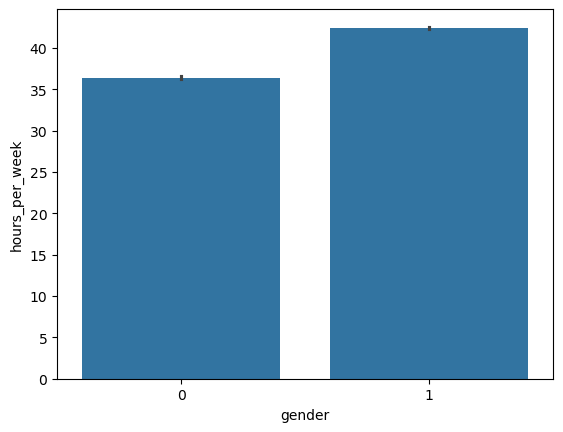

In [15]:
sns.barplot(x="gender",y="hours_per_week",data=Adult)

#### males works hours per week is greater than female .

<Axes: xlabel='income', ylabel='count'>

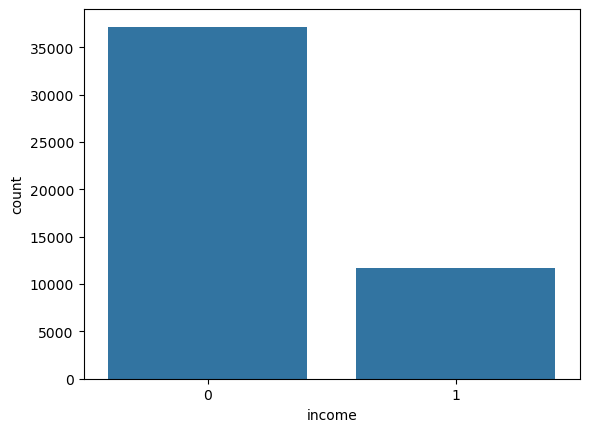

In [16]:
sns.countplot(x="income",data=Adult)

#### income 0 == <=50K is more than 1 means== >50K

<Axes: xlabel='income', ylabel='Density'>

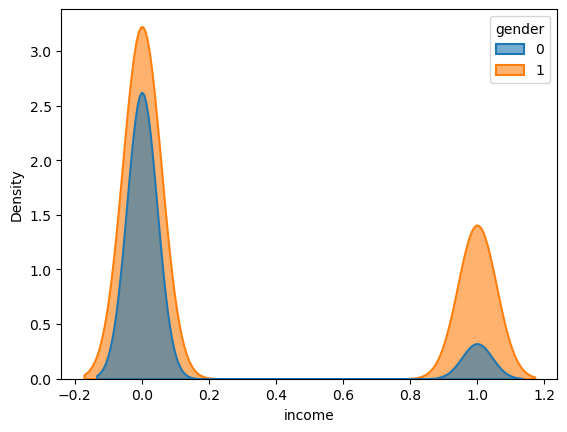

In [17]:
sns.kdeplot(data=Adult,x="income",hue="gender",fill=True,alpha=0.6,linewidth=1.5)

#### Male income is more than female 

In [18]:
d1=Adult.corr()
d1

,x,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
x,1.000000,-0.003973,-0.002106,0.001435,-0.000137,0.001213,-0.006673,-0.000618,-0.001028,-0.005392,0.000464,-0.000532,-0.001139,0.001497,-0.004497,0.006795
age,-0.003973,1.000000,0.017526,-0.076628,-0.015058,0.030940,-0.263978,-0.014259,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002861,0.230369
workclass,-0.002106,0.017526,1.000000,-0.016546,0.017187,0.055918,-0.068441,0.260005,-0.092365,0.052932,0.091223,0.036044,0.010880,0.141283,-0.008631,0.052674
fnlwgt,0.001435,-0.076628,-0.016546,1.000000,-0.022570,-0.038761,0.029851,0.000860,0.009092,-0.027062,0.027739,-0.003706,-0.004366,-0.013519,-0.048680,-0.006339
education,-0.000137,-0.015058,0.017187,-0.022570,1.000000,0.359668,-0.037417,-0.020972,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.061469,0.080091
educational_num,0.001213,0.030940,0.055918,-0.038761,0.359668,1.000000,-0.069992,0.112265,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.049107,0.332613
marital_status,-0.006673,-0.263978,-0.068441,0.029851,-0.037417,-0.069992,1.000000,-0.017179,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.021375,-0.199072
occupation,-0.000618,-0.014259,0.260005,0.000860,-0.020972,0.112265,-0.017179,1.000000,-0.076356,0.005671,0.075081,0.024163,0.017180,0.079986,-0.013424,0.076722
relationship,-0.001028,-0.263383,-0.092365,0.009092,-0.010758,-0.090534,0.187800,-0.076356,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.003962,-0.253214
race,-0.005392,0.028421,0.052932,-0.027062,0.013250,0.029239,-0.070104,0.005671,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.138231,0.070934


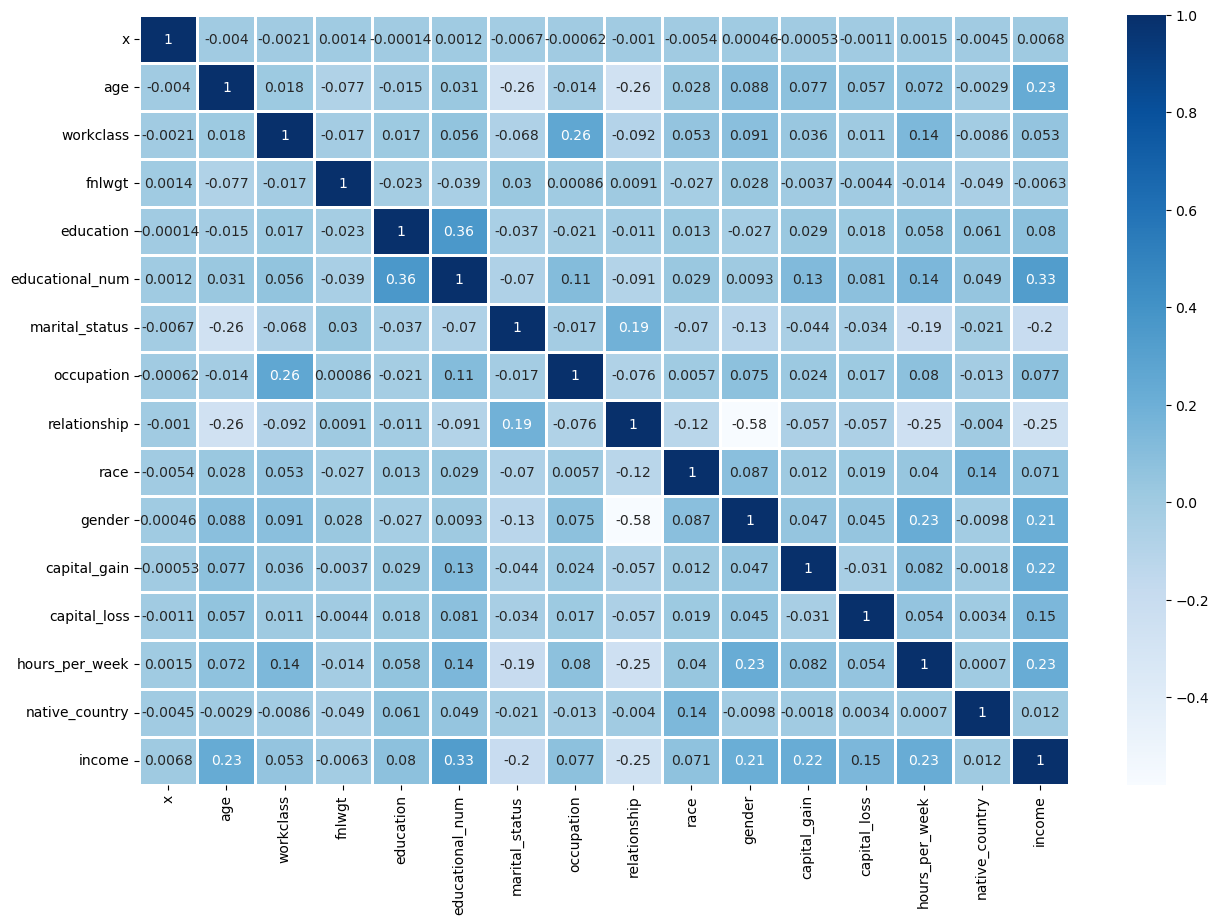

In [19]:
plt.figure(figsize=[15,10])
heatmap=sns.heatmap(d1,linewidth=1,annot=True,cmap=plt.cm.Blues)

### train and test split

In [20]:
x=Adult.iloc[:,0:15]
y=Adult.iloc[:,-1]
x.shape,y.shape

((48842, 15), (48842,))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
ad_x_train,ad_x_test,ad_y_train,ad_y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [23]:
ad_x_train.shape,ad_x_test.shape,ad_y_train.shape,ad_y_test.shape

((39073, 15), (9769, 15), (39073,), (9769,))

### Logistic Regression

In [24]:
from sklearn.linear_model  import LogisticRegression
lg=LogisticRegression()

In [25]:
lg.fit(ad_x_train,ad_y_train)

LogisticRegression()

In [26]:
p1=lg.predict(ad_x_test)
#p1

In [27]:
p_value=lg.predict_proba(ad_x_test)
#p_value

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm=confusion_matrix(p1,ad_y_test)
cm

array([[7009, 1701],
       [ 393,  666]], dtype=int64)

In [30]:
TN, FP, FN, TP = cm.ravel()

In [31]:
lp = TP / (TP + FP)
lp

0.2813688212927757

In [32]:
lr = TP / (TP + FN)
lr

0.6288951841359773

In [33]:
lf1 = 2 * (lp * lr) / (lp + lr)
lf1

0.3887915936952715

In [34]:
ac=cm.diagonal().sum()/cm.sum()*100
ac  

78.56484798853516

In [35]:
from sklearn.metrics import classification_report
print(classification_report(p1,ad_y_test))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      8710
           1       0.28      0.63      0.39      1059

    accuracy                           0.79      9769
   macro avg       0.61      0.72      0.63      9769
weighted avg       0.87      0.79      0.82      9769



### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [37]:
dt.fit(ad_x_train,ad_y_train)

DecisionTreeClassifier()

In [38]:
dp=dt.predict(ad_x_test)

In [39]:
d_m=confusion_matrix(dp,ad_y_test)
d_m

array([[6425,  910],
       [ 977, 1457]], dtype=int64)

In [40]:
TN, FP, FN, TP = d_m.ravel()

In [41]:
d_p = TP / (TP + FP)
d_p

0.6155471060414026

In [42]:
d_r = TP / (TP + FN)
d_r

0.5986031224322104

In [43]:
df1 = 2 * (d_p * d_r) / (d_p + d_r)
df1

0.6069568839825036

In [44]:
d_ac=d_m.diagonal().sum()/d_m.sum()*100
d_ac

80.68379568021292

In [45]:
print(classification_report(dp,ad_y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7335
           1       0.62      0.60      0.61      2434

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [47]:
rf.fit(ad_x_train,ad_y_train)

RandomForestClassifier()

In [48]:
rp=rf.predict(ad_x_test)

In [49]:
r_m=confusion_matrix(rp,ad_y_test)
r_m

array([[6923,  903],
       [ 479, 1464]], dtype=int64)

In [50]:
TN, FP, FN, TP = r_m.ravel()

In [51]:
r_p = TP / (TP + FP)
r_p

0.6185044359949303

In [52]:
r_r = TP / (TP + FN)
r_r

0.7534740092640247

In [53]:
rf1 = 2 * (r_p * r_r) / (r_p + r_r)
rf1

0.6793503480278423

In [54]:
r_ac=r_m.diagonal().sum()/r_m.sum()*100
r_ac

85.85320913092436

In [55]:
print(classification_report(rp,ad_y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7826
           1       0.62      0.75      0.68      1943

    accuracy                           0.86      9769
   macro avg       0.78      0.82      0.79      9769
weighted avg       0.87      0.86      0.86      9769



### AUC ROC Curve

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [57]:
roc=roc_auc_score(rp,ad_y_test) #predicted ,actual value
roc

0.8190446969397047

In [58]:
df=pd.DataFrame(rp)
df

,0
0,0
1,0
2,0
3,1
4,0
...,...
9764,0
9765,0
9766,0
9767,1


In [59]:
fpr,tpr,threshold =roc_curve(ad_y_test,rp)

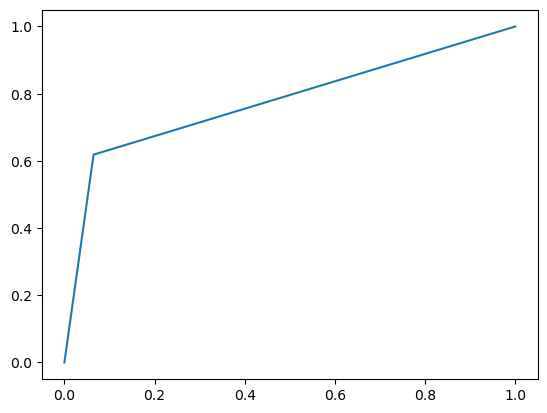

In [60]:
plt.plot(fpr,tpr)

### KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)

In [62]:
knn.fit(ad_x_train,ad_y_train)

KNeighborsClassifier(n_neighbors=20)

In [63]:
kp=knn.predict(ad_x_test)

In [64]:
k_m=confusion_matrix(kp,ad_y_test)
k_m

array([[7388, 2042],
       [  14,  325]], dtype=int64)

In [65]:
TN, FP, FN, TP = k_m.ravel()

In [66]:
k_p = TP / (TP + FP)
k_p

0.13730460498521335

In [67]:
k_r = TP / (TP + FN)
k_r

0.9587020648967551

In [68]:
kf1 = 2 * (k_p * k_r) / (k_p + k_r)
kf1

0.24020694752402066

In [69]:
k_ac=k_m.diagonal().sum()/k_m.sum()*100
k_ac

78.95383355512335

In [70]:
print(classification_report(kp,ad_y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      9430
           1       0.14      0.96      0.24       339

    accuracy                           0.79      9769
   macro avg       0.57      0.87      0.56      9769
weighted avg       0.97      0.79      0.86      9769



In [71]:
#lst=list()

In [72]:
#for i in range(1,60):
#    knn=KNeighborsClassifier(n_neighbors=i)
#    knn.fit(ad_x_train,ad_y_train)
#    knn_p=knn.predict(ad_x_test)
#    c=confusion_matrix(knn_p,ad_y_test)
#    acc=c.diagonal().sum()/c.sum()*100
#    lst.append(acc)

In [73]:
#p=plt.plot(lst)

### SVM

In [74]:
from sklearn.svm import SVC
svc=SVC()

In [75]:
svc.fit(ad_x_train,ad_y_train)

SVC()

In [76]:
sp=svc.predict(ad_x_test)
sp

array([0, 0, 0, ..., 0, 1, 0])

In [77]:
sm=confusion_matrix(sp,ad_y_test)
sm

array([[7390, 1996],
       [  12,  371]], dtype=int64)

In [78]:
TN, FP, FN, TP = sm.ravel()

In [79]:
s_p = TP / (TP + FP)
s_p

0.15673848753696662

In [80]:
s_r = TP / (TP + FN)
s_r

0.9686684073107049

In [81]:
sf1 = 2 * (s_p * s_r) / (s_p + s_r)
sf1

0.26981818181818185

In [82]:
s_ac=sm.diagonal().sum()/sm.sum()*100
s_ac

79.44518374449791

In [83]:
print(classification_report(sp,ad_y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      9386
           1       0.16      0.97      0.27       383

    accuracy                           0.79      9769
   macro avg       0.58      0.88      0.58      9769
weighted avg       0.97      0.79      0.86      9769



### Naive Bayes

In [84]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [85]:
nb.fit(ad_x_train,ad_y_train)

MultinomialNB()

In [86]:
np=nb.predict(ad_x_test)

In [87]:
n_m=confusion_matrix(np,ad_y_test)
n_m

array([[7076, 1825],
       [ 326,  542]], dtype=int64)

In [88]:
TN, FP, FN, TP = n_m.ravel()

In [89]:
n_p = TP / (TP + FP)
n_p

0.2289818335445712

In [90]:
n_r = TP / (TP + FN)
n_r

0.6244239631336406

In [91]:
nf1 = 2 * (n_p * n_r) / (n_p + n_r)
nf1

0.3350850077279752

In [92]:
n_ac=n_m.diagonal().sum()/n_m.sum()*100
n_ac

77.9813696386529

In [93]:
print(classification_report(np,ad_y_test))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      8901
           1       0.23      0.62      0.34       868

    accuracy                           0.78      9769
   macro avg       0.59      0.71      0.60      9769
weighted avg       0.89      0.78      0.82      9769



### Report

In [94]:
list1=["logistic","DT",  "RF", "KNN",  "NB" ,  "SVM"    ]
list2=[  ac,     d_ac,   r_ac,  k_ac,   n_ac ,  s_ac ]
list3=[  lp,     d_p,    r_p,   k_p,   n_p ,    s_p ]
list4=[  lr,     d_r,    r_r,   k_r,   n_r ,    s_r ]
list5=[  lf1,    df1,    rf1,   kf1,   nf1 ,    sf1 ]

In [95]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1-score":list5})
result

,model_name,Accuracy,Precision,Recall,F1-score
0,logistic,78.564848,0.281369,0.628895,0.388792
1,DT,80.683796,0.615547,0.598603,0.606957
2,RF,85.853209,0.618504,0.753474,0.679350
3,KNN,78.953834,0.137305,0.958702,0.240207
4,NB,77.981370,0.228982,0.624424,0.335085
5,SVM,79.445184,0.156738,0.968668,0.269818


##### Random Forest is the top-performing model in terms of accuracy, precision, recall, and F1-score.

## Class Imbalance

In [96]:
Adult.income.value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [97]:
#t_0,t_1=Adult["income"].value_counts()
#t_0,t_1

In [98]:
#train_0=Adult[Adult["income"]==0]
#train_1=Adult[Adult["income"]==1]
#train_0.shape,train_1.shape

### Random Undersampling

In [99]:
#import random

In [100]:
#ru=train_0.sample(t_1)

In [101]:
#r_u=pd.concat([ru,train_1],axis=0)

In [102]:
#r_u.shape

In [103]:
#r_u.income.value_counts()

### Random Oversampling

In [104]:
#ro=train_1.sample(t_0,replace=True)

In [105]:
#r_o=pd.concat([ro,train_0],axis=0)

In [106]:
#r_o.shape

In [107]:
#r_o["income"].value_counts()

### IMB learn Oversampling


In [108]:
#x=Adult.iloc[:,1:-1]
#y=Adult.iloc[:,-1]
#x.head()
#y.head()

In [109]:
#import imblearn

In [110]:
#from imblearn.over_sampling import RandomOverSampler

In [111]:
#ab1=RandomOverSampler(random_state=42)
#x1,y1=ab1.fit_resample(x,y)

In [112]:
#x1.shape,y1.shape

In [113]:
#y1.value_counts()

### Imb learn Undersampling 

In [114]:
#from imblearn.under_sampling import RandomUnderSampler

In [115]:
#a2=RandomUnderSampler(sampling_strategy="all")

In [116]:
#x2,y2=a2.fit_resample(x,y)

In [117]:
#x2.shape,y2.shape

In [118]:
#y2.value_counts()

### SMOTE

In [119]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [120]:
x_sm,y_sm=smote.fit_resample(x,y)

In [121]:
x_sm.shape,y_sm.shape

((74310, 15), (74310,))

In [122]:
y_sm.value_counts()

income
0    37155
1    37155
Name: count, dtype: int64

In [123]:
## SMOTE is generally the best choice for handling class imbalance. Balanced Data without Overfitting.

### Outlier treatement

<Axes: >

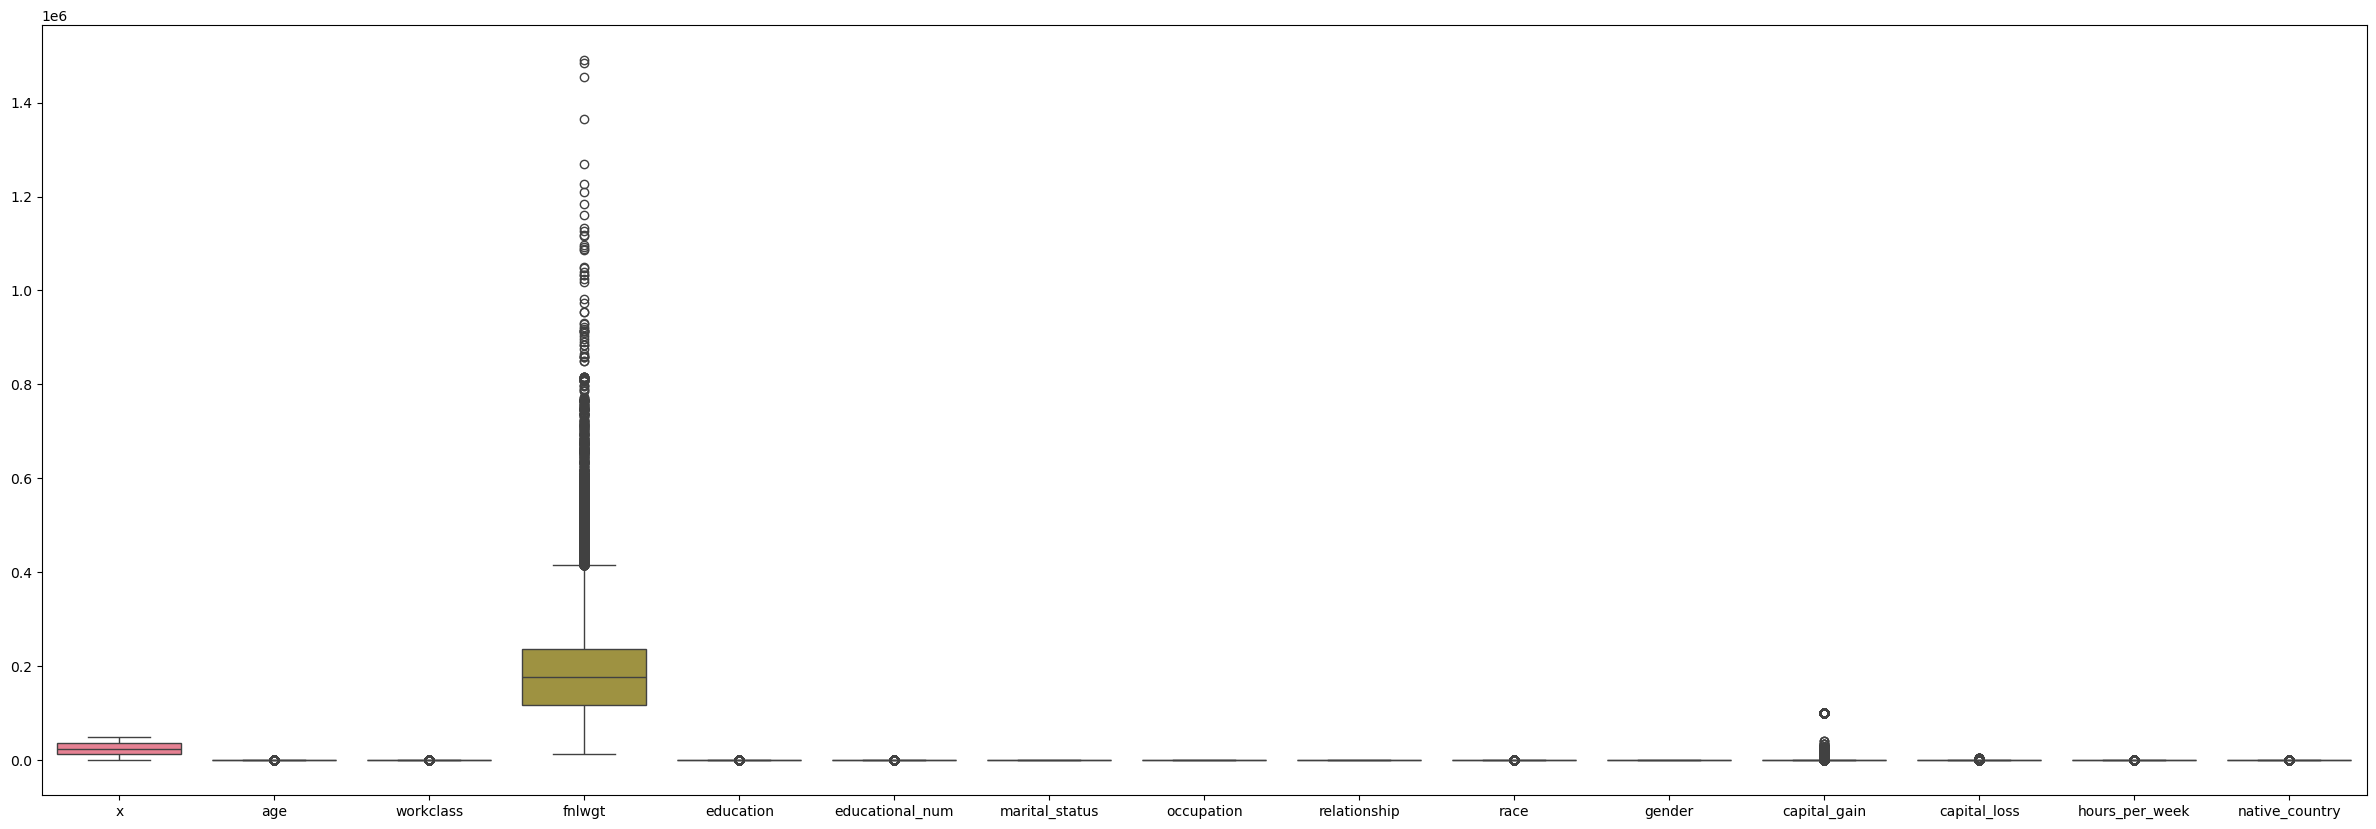

In [124]:
plt.figure(figsize=[30,10])
sns.boxplot(data=x_sm)

#### age

<Axes: ylabel='age'>

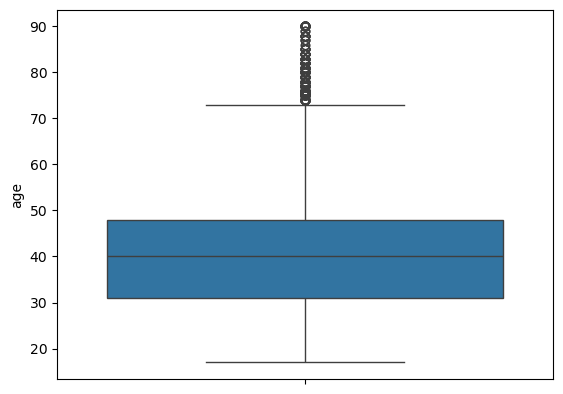

In [125]:
sns.boxplot(data=x_sm,y="age")

<Axes: xlabel='age', ylabel='Density'>

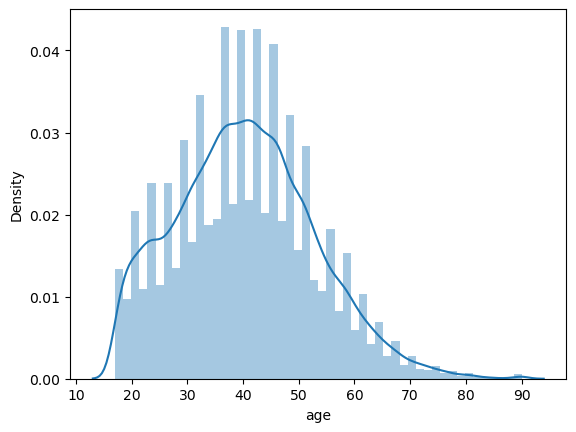

In [126]:
sns.distplot(x_sm["age"])

In [127]:
x_sm["age"].describe()

count    74310.000000
mean        40.398560
std         12.440824
min         17.000000
25%         31.000000
50%         40.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [128]:
up=x_sm["age"].mean()+3*x_sm["age"].std()
lp=x_sm["age"].mean()-3*x_sm["age"].std()
print(up),print(lp)

77.72103227328385
3.076087898967529


(None, None)

In [129]:
x_sm.loc[x_sm["age"]>up,"age"]=up
x_sm.loc[x_sm["age"]<lp,"age"]=lp

<Axes: xlabel='age', ylabel='Density'>

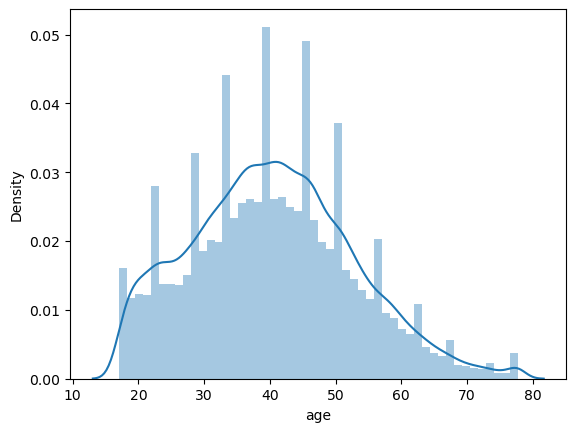

In [130]:
sns.distplot(x_sm["age"])

### fnlwgt

<Axes: ylabel='fnlwgt'>

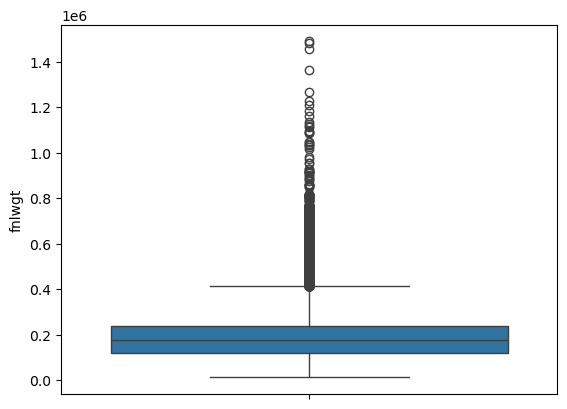

In [131]:
sns.boxplot(data=x_sm,y="fnlwgt")

(array([3.0475e+04, 3.4544e+04, 8.0340e+03, 9.5200e+02, 2.0600e+02,
        6.1000e+01, 1.9000e+01, 1.2000e+01, 3.0000e+00, 4.0000e+00]),
 array([  12285. ,  160096.5,  307908. ,  455719.5,  603531. ,  751342.5,
         899154. , 1046965.5, 1194777. , 1342588.5, 1490400. ]),
 <BarContainer object of 10 artists>)

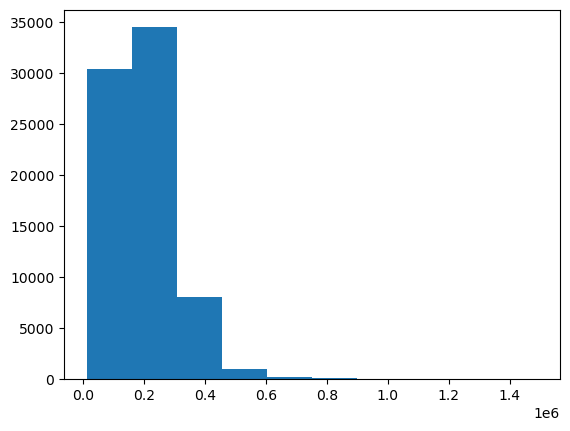

In [132]:
plt.hist(x_sm["fnlwgt"])

<Axes: xlabel='fnlwgt', ylabel='Density'>

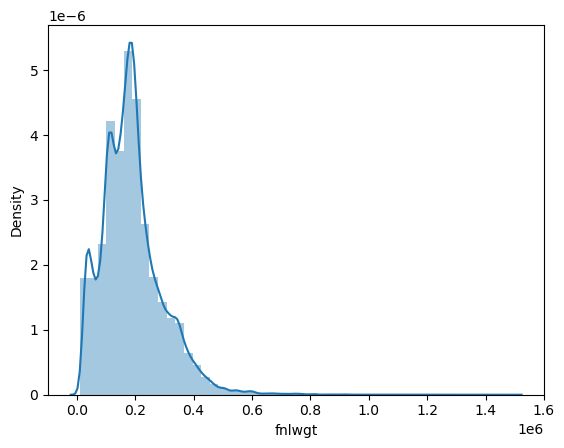

In [133]:
sns.distplot(x_sm["fnlwgt"])

In [134]:
x_sm["fnlwgt"].describe()

count    7.431000e+04
mean     1.892082e+05
std      1.044079e+05
min      1.228500e+04
25%      1.178330e+05
50%      1.775720e+05
75%      2.365730e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [135]:
IQR1=x_sm.fnlwgt.quantile(0.75)-x_sm.fnlwgt.quantile(0.25)
IQR1

118740.0

In [136]:
up1=x_sm.fnlwgt.quantile(0.75)+(3*IQR1)
up1

592793.0

In [137]:
x_sm.loc[x_sm["fnlwgt"]>591321.0,"fnlwgt"]=591321.0

(array([ 7740., 13960., 18761., 16663.,  7295.,  5169.,  2612.,  1114.,
          392.,   604.]),
 array([ 12285. ,  70188.6, 128092.2, 185995.8, 243899.4, 301803. ,
        359706.6, 417610.2, 475513.8, 533417.4, 591321. ]),
 <BarContainer object of 10 artists>)

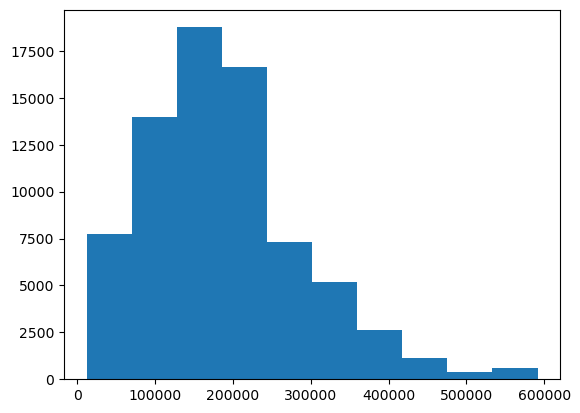

In [138]:
plt.hist(x_sm["fnlwgt"])

<Axes: xlabel='fnlwgt', ylabel='Density'>

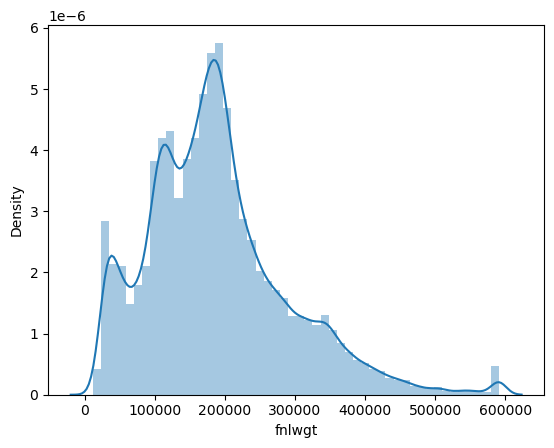

In [139]:
sns.distplot(x_sm["fnlwgt"])

### educational_num

<Axes: ylabel='educational_num'>

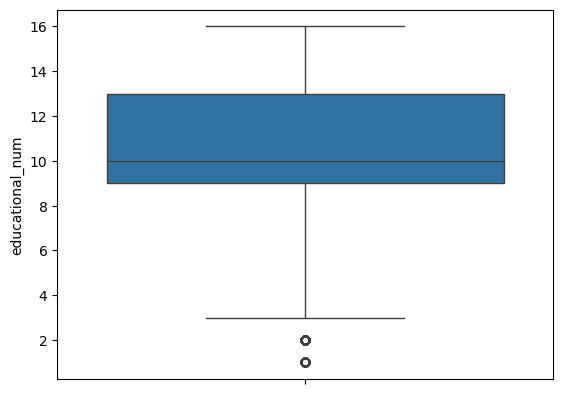

In [140]:
sns.boxplot(data=x_sm,y="educational_num")

<Axes: xlabel='educational_num', ylabel='Density'>

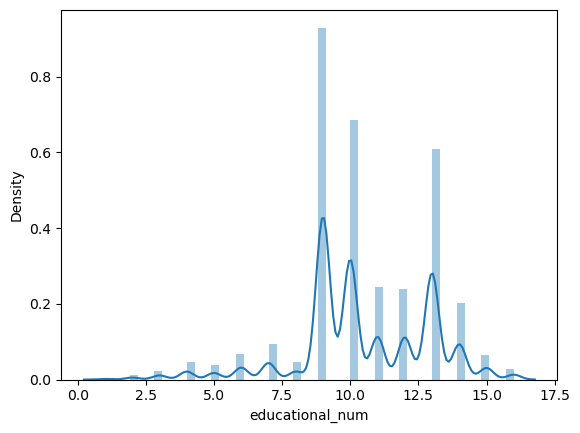

In [141]:
sns.distplot(x_sm["educational_num"])

In [142]:
x_sm["educational_num"].describe()

count    74310.000000
mean        10.457300
std          2.431718
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: educational_num, dtype: float64

In [143]:
up=x_sm["educational_num"].mean()+3*x_sm["educational_num"].std()
lp=x_sm["educational_num"].mean()-3*x_sm["educational_num"].std()
print(up),print(lp)

17.752455656297595
3.162145339530692


(None, None)

In [144]:
x_sm.loc[x_sm["educational_num"]>up,"educational_num"]=up
x_sm.loc[x_sm["educational_num"]<lp,"educational_num"]=lp

<Axes: xlabel='educational_num', ylabel='Density'>

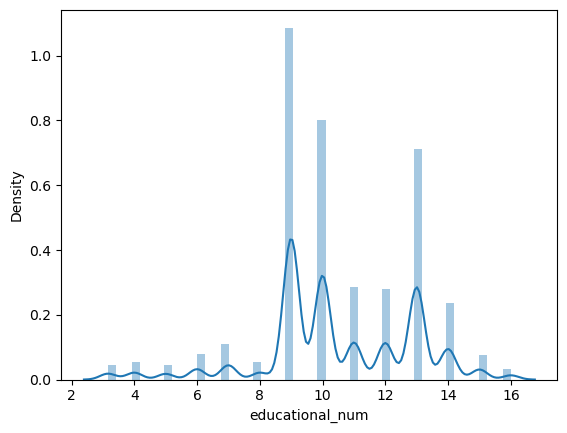

In [145]:
sns.distplot(x_sm["educational_num"])

### Skewness

In [146]:
x_sm.skew()

x                 -0.003277
age                0.299654
workclass         -0.746740
fnlwgt             0.943532
education         -0.974975
educational_num   -0.358467
marital_status     0.318883
occupation         0.088876
relationship       1.121678
race              -2.460165
gender            -0.790890
capital_gain       8.367435
capital_loss       4.055234
hours_per_week     0.151449
native_country    -3.648717
dtype: float64

In [147]:
x_sm.head()

,x,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,1,25.0,4,226802,1,7.0,4,7,3,2,1,0,0,40,39
1,2,38.0,4,89814,11,9.0,2,5,0,4,1,0,0,50,39
2,3,28.0,2,336951,7,12.0,2,11,0,4,1,0,0,40,39
3,4,44.0,4,160323,15,10.0,2,7,0,2,1,7688,0,40,39
4,5,18.0,0,103497,15,10.0,4,0,3,4,0,0,0,30,39


In [148]:
y_sm.head(2)

0    0
1    0
Name: income, dtype: int32

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x_sm,y_sm,test_size=0.2,random_state=101)

In [151]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((59448, 15), (14862, 15), (59448,), (14862,))

### Logistic Regression

In [152]:
from sklearn.linear_model  import LogisticRegression
lg=LogisticRegression()

In [153]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [154]:
p2=lg.predict(x1_te)
#p2

In [155]:
from sklearn.metrics import confusion_matrix

In [156]:
cm1 = confusion_matrix(p2,y1_te)
cm1

array([[4790, 2886],
       [2589, 4597]], dtype=int64)

In [157]:
TN, FP, FN, TP = cm1.ravel()

In [158]:
lp1 = TP / (TP + FP)
lp1

0.614325805158359

In [159]:
lr1 = TP / (TP + FN)
lr1

0.6397161146674089

In [160]:
l_f1 = 2 * (lp1 * lr1) / (lp1 + lr1)
l_f1

0.6267639239211943

In [161]:
ac1=cm1.diagonal().sum()/cm1.sum()*100
ac1  

63.161081953976584

In [162]:
from sklearn.metrics import classification_report
print(classification_report(p2,y1_te))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64      7676
           1       0.61      0.64      0.63      7186

    accuracy                           0.63     14862
   macro avg       0.63      0.63      0.63     14862
weighted avg       0.63      0.63      0.63     14862



### Decision Tree

In [163]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [164]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [165]:
dp1=dt.predict(x1_te)

In [166]:
d_m1=confusion_matrix(dp1,y1_te)
d_m1

array([[6230, 1031],
       [1149, 6452]], dtype=int64)

In [167]:
TN, FP, FN, TP = d_m1.ravel()

In [168]:
d_p1 = TP / (TP + FP)
d_p1

0.8622210343445142

In [169]:
d_r1 = TP / (TP + FN)
d_r1

0.8488356795158531

In [170]:
d_f1 = 2 * (d_p1 * d_r1) / (d_p1 + d_r1)
d_f1

0.8554760010607265

In [171]:
d_ac1=d_m1.diagonal().sum()/d_m1.sum()*100
d_ac1

85.33171847665186

In [172]:
print(classification_report(dp1,y1_te))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7261
           1       0.86      0.85      0.86      7601

    accuracy                           0.85     14862
   macro avg       0.85      0.85      0.85     14862
weighted avg       0.85      0.85      0.85     14862



### Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [174]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [175]:
rp1=rf.predict(x1_te)

In [176]:
r_m1=confusion_matrix(rp1,y1_te)
r_m1

array([[6626,  750],
       [ 753, 6733]], dtype=int64)

In [177]:
TN, FP, FN, TP = r_m1.ravel()

In [178]:
r_p1 = TP / (TP + FP)
r_p1

0.8997728183883469

In [179]:
r_r1 = TP / (TP + FN)
r_r1

0.8994122361741919

In [180]:
r_f1 = 2 * (r_p1 * r_r1) / (r_p1 + r_r1)
r_f1

0.8995924911483734

In [181]:
r_ac1=r_m1.diagonal().sum()/r_m1.sum()*100
r_ac1

89.88696003229714

In [182]:
print(classification_report(rp1,y1_te))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7376
           1       0.90      0.90      0.90      7486

    accuracy                           0.90     14862
   macro avg       0.90      0.90      0.90     14862
weighted avg       0.90      0.90      0.90     14862



### precision recall

In [183]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [184]:
precision, recall, thresholds = precision_recall_curve(y1_te,rp1)

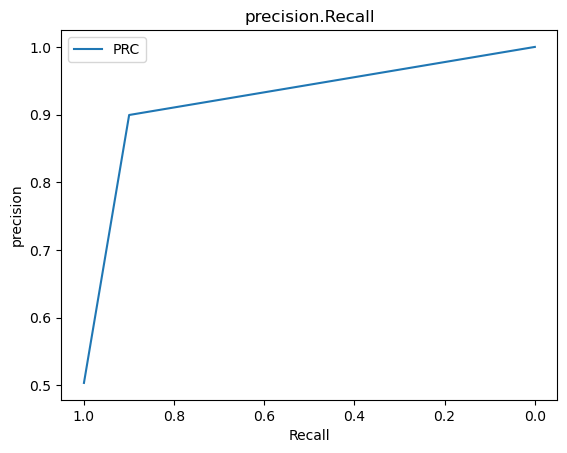

In [185]:
plt.plot(recall,precision,label="PRC")
plt.xlabel("Recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("precision.Recall")
plt.gca().invert_xaxis()
plt.show()

### KNN

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)

In [187]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=20)

In [188]:
kp1=knn.predict(x1_te)

In [189]:
k_m1=confusion_matrix(kp1,y1_te)
k_m1

array([[5349, 2940],
       [2030, 4543]], dtype=int64)

In [190]:
TN, FP, FN, TP = k_m1.ravel()

In [191]:
k_p1 = TP / (TP + FP)
k_p1

0.6071094480823199

In [192]:
k_r1 = TP / (TP + FN)
k_r1

0.691160809371672

In [193]:
k_f1 = 2 * (k_p1 * k_r1) / (k_p1 + k_r1)
k_f1

0.6464143426294822

In [194]:
k_ac1=k_m1.diagonal().sum()/k_m1.sum()*100
k_ac1

66.55900955456869

In [195]:
print(classification_report(kp1,y1_te))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68      8289
           1       0.61      0.69      0.65      6573

    accuracy                           0.67     14862
   macro avg       0.67      0.67      0.66     14862
weighted avg       0.67      0.67      0.67     14862



In [196]:
#lst=list()

In [197]:
#for i in range(1,60):
#    knn=KNeighborsClassifier(n_neighbors=i)
#    knn.fit(x1_tr,y1_tr)
#    knn_p=knn.predict(x1_te)
#    c=confusion_matrix(knn_p,y1_te)
#    acc=c.diagonal().sum()/c.sum()*100
#    lst.append(acc)

In [198]:
#p=plt.plot(lst)

### SVM

In [199]:
from sklearn.svm import SVC
svc=SVC()

In [200]:
svc.fit(x1_tr,y1_tr)

SVC()

In [201]:
sp1=svc.predict(x1_te)
sp1

array([0, 0, 0, ..., 0, 0, 0])

In [202]:
sm1=confusion_matrix(sp1,y1_te)
sm1

array([[7284, 6032],
       [  95, 1451]], dtype=int64)

In [203]:
TN, FP, FN, TP = sm1.ravel()

In [204]:
s_p1 = TP / (TP + FP)
s_p1

0.1939061873580115

In [205]:
s_r1 = TP / (TP + FN)
s_r1

0.9385510996119016

In [206]:
s_f1 = 2 * (s_p1 * s_r1) / (s_p1 + s_r1)
s_f1

0.3214087938863661

In [207]:
s_ac1=sm1.diagonal().sum()/sm1.sum()*100
s_ac1

58.774054635984385

In [208]:
print(classification_report(sp1,y1_te))

              precision    recall  f1-score   support

           0       0.99      0.55      0.70     13316
           1       0.19      0.94      0.32      1546

    accuracy                           0.59     14862
   macro avg       0.59      0.74      0.51     14862
weighted avg       0.90      0.59      0.66     14862



### Naive Bayes

In [209]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [210]:
nb.fit(x1_tr,y1_tr)

MultinomialNB()

In [211]:
np1=nb.predict(x1_te)

In [212]:
n_m1=confusion_matrix(np1,y1_te)
n_m1

array([[7052, 5824],
       [ 327, 1659]], dtype=int64)

In [213]:
TN, FP, FN, TP = n_m1.ravel()

In [214]:
n_p1 = TP / (TP + FP)
n_p1

0.22170252572497662

In [215]:
n_r1 = TP / (TP + FN)
n_r1

0.8353474320241692

In [216]:
n_f1 = 2 * (n_p1 * n_r1) / (n_p1 + n_r1)
n_f1

0.35040658992501844

In [217]:
n_ac1=n_m1.diagonal().sum()/n_m1.sum()*100
n_ac1

58.61256896783744

In [218]:
print(classification_report(np1,y1_te))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70     12876
           1       0.22      0.84      0.35      1986

    accuracy                           0.59     14862
   macro avg       0.59      0.69      0.52     14862
weighted avg       0.86      0.59      0.65     14862



### Report

In [219]:
list1=["logistic","DT","RF","KNN","NB" ,  "SVM"]
list2=[ac1, d_ac1, r_ac1, k_ac1,  n_ac1 ,  s_ac1  ]
list3=[lp1,  d_p1,  r_p1,  k_p1,   n_p1 ,  s_p1]
list4=[lr1,  d_r1,  r_r1,  k_r1,    n_r1 , s_r1 ]
list5=[l_f1, d_f1, r_f1, k_f1,    n_f1  ,  s_f1, ]

In [220]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1-score":list5})
result

,model_name,Accuracy,Precision,Recall,F1-score
0,logistic,63.161082,0.614326,0.639716,0.626764
1,DT,85.331718,0.862221,0.848836,0.855476
2,RF,89.886960,0.899773,0.899412,0.899592
3,KNN,66.559010,0.607109,0.691161,0.646414
4,NB,58.612569,0.221703,0.835347,0.350407
5,SVM,58.774055,0.193906,0.938551,0.321409


In [221]:
## Random Forest is the top-performing model in terms of accuracy, precision, recall, and F1-score.

### XG Boost

In [222]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [223]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [224]:
xgb_p=xgb.predict(x1_te)

In [225]:
xgb_m=confusion_matrix(xgb_p,y1_te)
xgb_m

array([[6729,  776],
       [ 650, 6707]], dtype=int64)

In [226]:
TN, FP, FN, TP = xgb_m.ravel()

In [227]:
xgb_p1 = TP / (TP + FP)
xgb_p1

0.8962982760924763

In [228]:
xgb_r1 = TP / (TP + FN)
xgb_r1

0.9116487698790268

In [229]:
xgb_f1 = 2 * (xgb_p1 * xgb_r1) / (xgb_p1 +xgb_r1)
xgb_f1

0.9039083557951483

In [230]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

90.4050598842686

In [231]:
print(classification_report(xgb_p,y1_te))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7505
           1       0.90      0.91      0.90      7357

    accuracy                           0.90     14862
   macro avg       0.90      0.90      0.90     14862
weighted avg       0.90      0.90      0.90     14862



### Feature Engineering

#### RFE(Recursive feature elimination)

In [232]:
from sklearn.feature_selection import RFE

In [233]:
rfe=RFE(rf)

In [234]:
rfe.fit(x1_tr,y1_tr)

RFE(estimator=RandomForestClassifier())

In [235]:
rfe.support_ 

array([ True,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False,  True, False])

In [236]:
df3=pd.DataFrame(rfe.support_)
df3

,0
0,True
1,True
2,False
3,True
4,False
5,True
6,True
7,False
8,True
9,False


In [237]:
pdf4=pd.DataFrame({"feature_score":list(rfe.support_),"columns":list(x_sm.iloc[:,0:15])})
pdf4

,feature_score,columns
0,True,x
1,True,age
2,False,workclass
3,True,fnlwgt
4,False,education
5,True,educational_num
6,True,marital_status
7,False,occupation
8,True,relationship
9,False,race


In [238]:
unwanted_columns =["x","workclass","education","occupation","race","gender","capital_gain","capital_loss","native_country"]
data2=x_sm.drop(unwanted_columns, axis=1)

In [239]:
data2.head()

,age,fnlwgt,educational_num,marital_status,relationship,hours_per_week
0,25.0,226802,7.0,4,3,40
1,38.0,89814,9.0,2,0,50
2,28.0,336951,12.0,2,0,40
3,44.0,160323,10.0,2,0,40
4,18.0,103497,10.0,4,3,30


In [240]:
x2=data2

y2=y_sm

In [241]:
rx2_tr,rx2_te,ry2_tr,ry2_te=train_test_split(x2,y2,test_size=0.2,random_state=101)

In [242]:
rx2_tr.shape,rx2_te.shape,ry2_tr.shape,ry2_te.shape

((59448, 6), (14862, 6), (59448,), (14862,))

In [243]:
y_sm.head

<bound method NDFrame.head of 0        0
1        0
2        1
3        1
4        0
        ..
74305    1
74306    1
74307    1
74308    1
74309    1
Name: income, Length: 74310, dtype: int32>

### Random Forest

In [244]:
rf.fit(rx2_tr,ry2_tr)

RandomForestClassifier()

In [245]:
rp2=rf.predict(rx2_te)

In [246]:
r_cm2=confusion_matrix(rp2,ry2_te)
r_cm2

array([[6130, 1051],
       [1249, 6432]], dtype=int64)

In [247]:
TN, FP, FN, TP = r_cm2.ravel()

In [248]:
r_p2 = TP / (TP + FP)
r_p2

0.8595483095015368

In [249]:
r_r2 = TP / (TP + FN)
r_r2

0.8373909647181357

In [250]:
r_f1_2 = 2 * (r_p2 * r_r2) / (r_p2 + r_r2)
r_f1_2

0.8483249802163018

In [251]:
r_ac2=r_cm2.diagonal().sum()/r_cm2.sum()*100
r_ac2

84.5242901359171

In [252]:
print(classification_report(rp2,ry2_te))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7181
           1       0.86      0.84      0.85      7681

    accuracy                           0.85     14862
   macro avg       0.85      0.85      0.85     14862
weighted avg       0.85      0.85      0.85     14862



### XG boost

In [253]:
xgb.fit(rx2_tr,ry2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [254]:
xgb_p1=xgb.predict(rx2_te)

In [255]:
xgb_cm=confusion_matrix(xgb_p1,ry2_te)
xgb_cm

array([[6065,  855],
       [1314, 6628]], dtype=int64)

In [256]:
TN, FP, FN, TP = xgb_cm.ravel()

In [257]:
xgb_p2 = TP / (TP + FP)
xgb_p2

0.8857410129627155

In [258]:
xgb_r2 = TP / (TP + FN)
xgb_r2

0.8345504910601863

In [259]:
xgb_f1_2 = 2 * (xgb_p2 * xgb_r2) / (xgb_p2 +xgb_r2)
xgb_f1_2

0.8593841166936791

In [260]:
xgb_acc2=xgb_cm.diagonal().sum()/xgb_cm.sum()*100
xgb_acc2

85.40573274121923

In [261]:
print(classification_report(xgb_p1,ry2_te))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      6920
           1       0.89      0.83      0.86      7942

    accuracy                           0.85     14862
   macro avg       0.85      0.86      0.85     14862
weighted avg       0.86      0.85      0.85     14862



In [262]:
list1=["RF",  "xgboost" ] 
list2=[ r_ac2,  xgb_acc2 ] 
list3=[ r_p2,   xgb_p2 ]  
list4=[ r_r2,   xgb_r2 ] 
list5=[ r_f1_2, xgb_f1_2 ]  

In [263]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1-score":list5})
resultFrom the above models xgboost is performing good.

,model_name,Accuracy,Precision,Recall,F1-score
0,RF,84.524290,0.859548,0.837391,0.848325
1,xgboost,85.405733,0.885741,0.834550,0.859384


#### From the above models xgboost is performing good.

### Cross validation

In [264]:
from sklearn.model_selection import cross_val_score

In [265]:
scores= cross_val_score(rf,x1_tr,y1_tr,cv=5)

In [266]:
print(f"cross-validation scores: {scores}")
print(f"Mean cv accuracy : {scores.mean():.2f}")

cross-validation scores: [0.89529016 0.89680404 0.89478553 0.89208512 0.90167382]
Mean cv accuracy : 0.90


### Stratified K Fold

In [267]:
from sklearn.model_selection import StratifiedKFold

In [268]:
skf = StratifiedKFold(n_splits=5)

In [269]:
scores2= cross_val_score(rf,x1_tr,y1_tr,cv=skf)

In [270]:
print(f"Stratified cv accuracy : {scores.mean():.2f}")

Stratified cv accuracy : 0.90


In [271]:
print(f"Standard deviation of cv Scores:{scores2.std():.2f}")

Standard deviation of cv Scores:0.00


#### Stratified CV accuracy:0.90

